### Récupération du dataset

In [1]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "dileep070/heart-disease-prediction-using-logistic-regression"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/framingham.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)

# Afficher les premières lignes
print(df.head())


d:\Sources\DS-Machine-Learning\Classification\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [2]:
display(df)
df.info()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Gestion des doublons et valeurs manquantes

In [3]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Education : remplacer les valeurs manquantes par la valeur la plus fréquente
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Cigs Per Day : vérifier si les valeurs manquantes correspondent à des non-fumeurs
#display(df.loc[df['cigsPerDay'].isna()])

# Ce sont des fumeurs, on remplace les valeurs manquantes par la médiane
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

# BPMeds : remplacer les valeurs manquantes par la valeur la plus fréquente
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

# TotChol : remplacer les valeurs manquantes par la médiane
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

# BMI : remplacer les valeurs manquantes par la médiane
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

# HeartRate : remplacer les valeurs manquantes par la médiane
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

# Glucose : remplacer les valeurs manquantes par la médiane
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Vérification de la validité des données

In [4]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['male'].unique())
print(df['education'].unique())
print(df['currentSmoker'].unique())
print(df['BPMeds'].unique())
print(df['prevalentStroke'].unique())
print(df['prevalentHyp'].unique())
print(df['diabetes'].unique())
print(df['TenYearCHD'].unique())

[1 0]
[4. 2. 1. 3.]
[0 1]
[0. 1.]
[0 1]
[0 1]
[0 1]
[0 1]


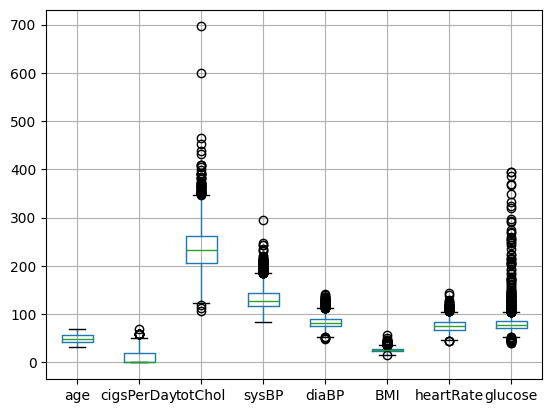

In [5]:
# Vérifier la distribution des données quantitatives avec des boxplots
import matplotlib.pyplot as plt
df.boxplot(column=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
plt.show()
# Les données semblent cohérentes

### Exploration / analyse des relations entre les données

In [6]:
# Faire un tableau de contingence pour les variables catégorielles
display(pd.crosstab(df['male'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['education'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['currentSmoker'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['BPMeds'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['prevalentStroke'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['prevalentHyp'], df['TenYearCHD'],normalize=0))
display(pd.crosstab(df['diabetes'], df['TenYearCHD'],normalize=0))

# Les 4 dernières variables semblent avoir un impact sur la variable cible


TenYearCHD,0,1
male,,
0,0.875568,0.124432
1,0.811435,0.188565


TenYearCHD,0,1
education,,
1.0,0.814247,0.185753
2.0,0.882682,0.117318
3.0,0.871907,0.128093
4.0,0.852008,0.147992


TenYearCHD,0,1
currentSmoker,,
0,0.854944,0.145056
1,0.840974,0.159026


TenYearCHD,0,1
BPMeds,,
0.0,0.853427,0.146573
1.0,0.669355,0.330645


TenYearCHD,0,1
prevalentStroke,,
0,0.849751,0.150249
1,0.560000,0.440000


TenYearCHD,0,1
prevalentHyp,,
0,0.890828,0.109172
1,0.753040,0.246960


TenYearCHD,0,1
diabetes,,
0,0.853718,0.146282
1,0.633028,0.366972


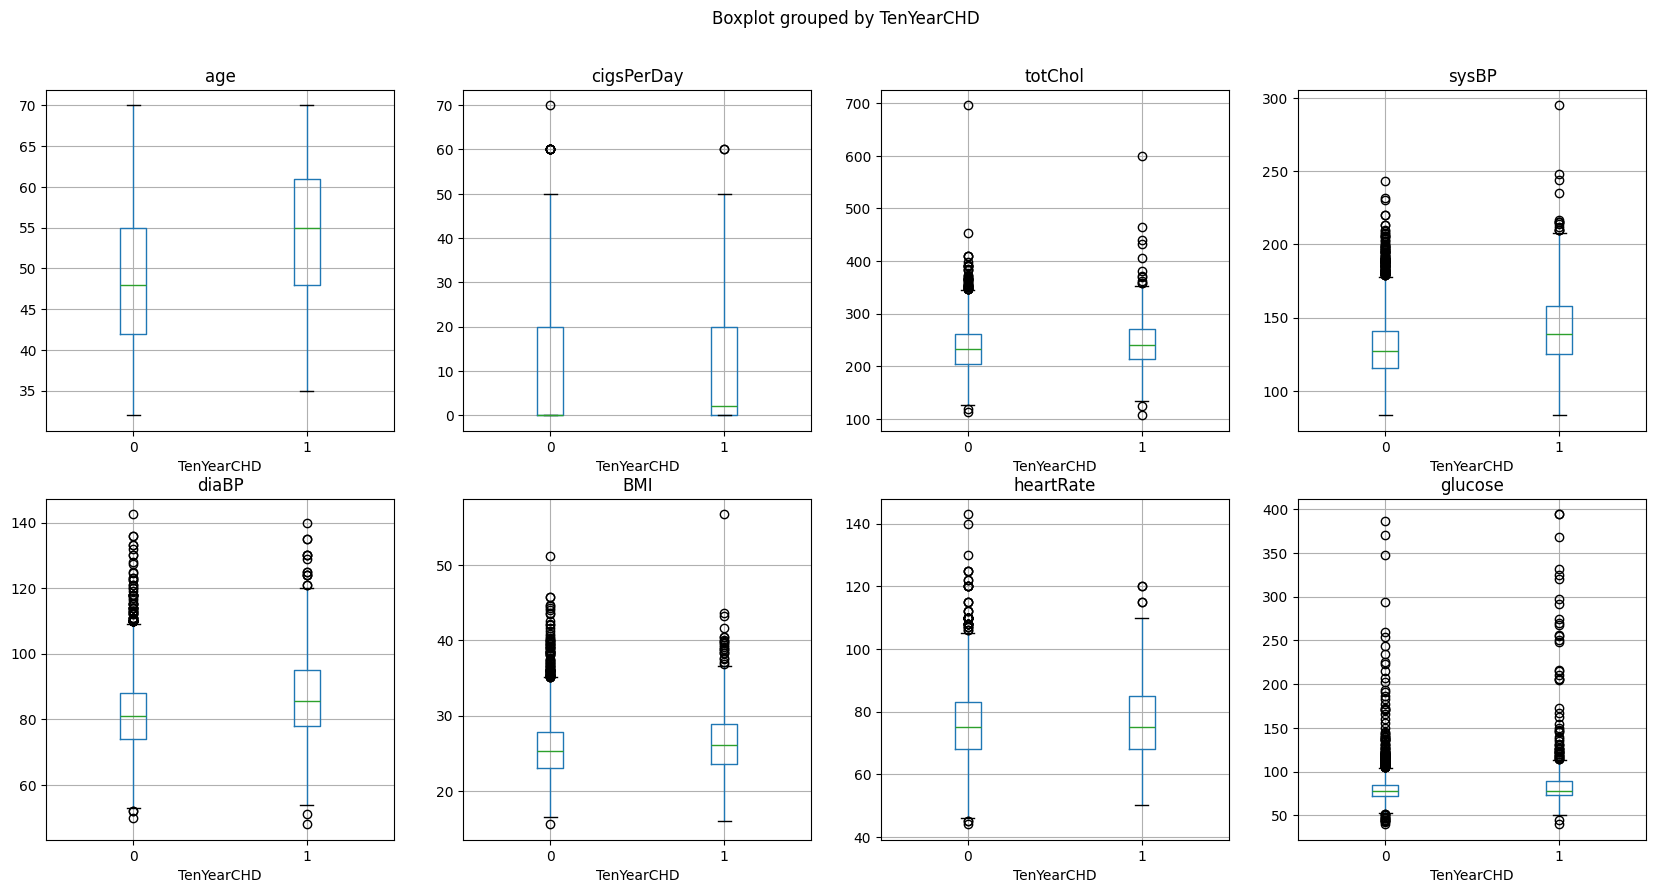

In [7]:
# Afficher avec Matplotlib les distributions des variables quantitatives en fonction de la variable cible

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
df.boxplot(column='age', by='TenYearCHD', ax=axs[0, 0])
df.boxplot(column='cigsPerDay', by='TenYearCHD', ax=axs[0, 1])
df.boxplot(column='totChol', by='TenYearCHD', ax=axs[0, 2])
df.boxplot(column='sysBP', by='TenYearCHD', ax=axs[0, 3])
df.boxplot(column='diaBP', by='TenYearCHD', ax=axs[1, 0])
df.boxplot(column='BMI', by='TenYearCHD', ax=axs[1, 1])
df.boxplot(column='heartRate', by='TenYearCHD', ax=axs[1, 2])
df.boxplot(column='glucose', by='TenYearCHD', ax=axs[1, 3])
plt.show()

# Les variables age, sysBP et diaBP semblent avoir un impact sur la variable cible

### Preprocessing

In [10]:
# Séparation features / target
data = df.drop(columns='TenYearCHD')
target = df['TenYearCHD']

# Séparation validating / training / testing
from sklearn.model_selection import train_test_split
X,X_valid,y,y_valid = train_test_split(data,target,test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb
valid = xgb.DMatrix(data=X_valid,label=y_valid)
train = xgb.DMatrix(data=X_train,label=y_train)
test = xgb.DMatrix(data=X_test,label=y_test)

### Entraînement du modèle XGBoost

In [12]:
# Entraîner le modèle
params = {
    'booster' : 'gbtree',
    'learning_rate' : 0.01,
    'objective' : 'binary:logistic'
}
xgbclf = xgb.train(params,train,num_boost_round=700,early_stopping_rounds=60,evals=[(train, 'train'), (test, 'eval')])

[0]	train-logloss:0.44099	eval-logloss:0.41239
[1]	train-logloss:0.43955	eval-logloss:0.41157
[2]	train-logloss:0.43816	eval-logloss:0.41074
[3]	train-logloss:0.43679	eval-logloss:0.40993
[4]	train-logloss:0.43540	eval-logloss:0.40914
[5]	train-logloss:0.43407	eval-logloss:0.40840
[6]	train-logloss:0.43273	eval-logloss:0.40757
[7]	train-logloss:0.43145	eval-logloss:0.40684
[8]	train-logloss:0.43020	eval-logloss:0.40616
[9]	train-logloss:0.42893	eval-logloss:0.40543
[10]	train-logloss:0.42772	eval-logloss:0.40473
[11]	train-logloss:0.42654	eval-logloss:0.40414
[12]	train-logloss:0.42541	eval-logloss:0.40352
[13]	train-logloss:0.42424	eval-logloss:0.40288
[14]	train-logloss:0.42303	eval-logloss:0.40230
[15]	train-logloss:0.42186	eval-logloss:0.40169
[16]	train-logloss:0.42070	eval-logloss:0.40112
[17]	train-logloss:0.41957	eval-logloss:0.40057
[18]	train-logloss:0.41844	eval-logloss:0.40008
[19]	train-logloss:0.41734	eval-logloss:0.39945
[20]	train-logloss:0.41626	eval-logloss:0.39883
[2

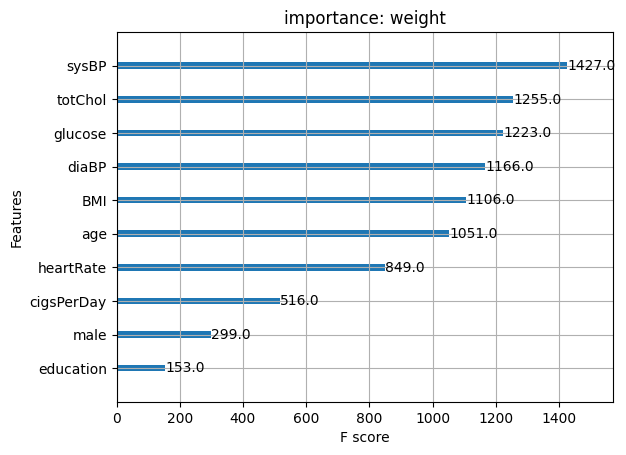

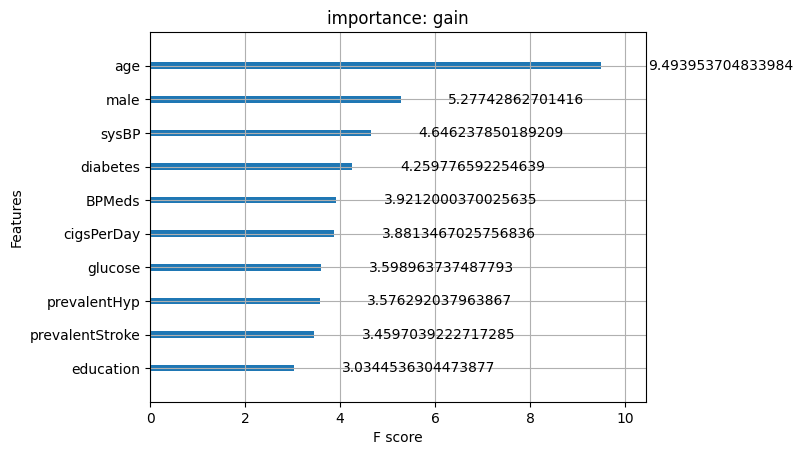

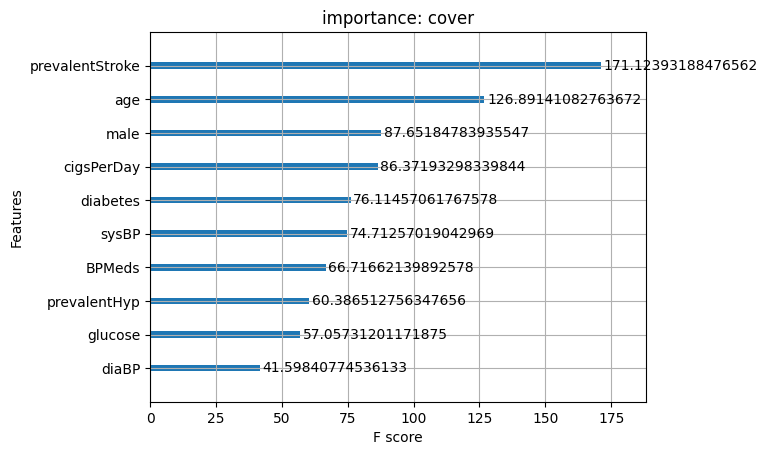

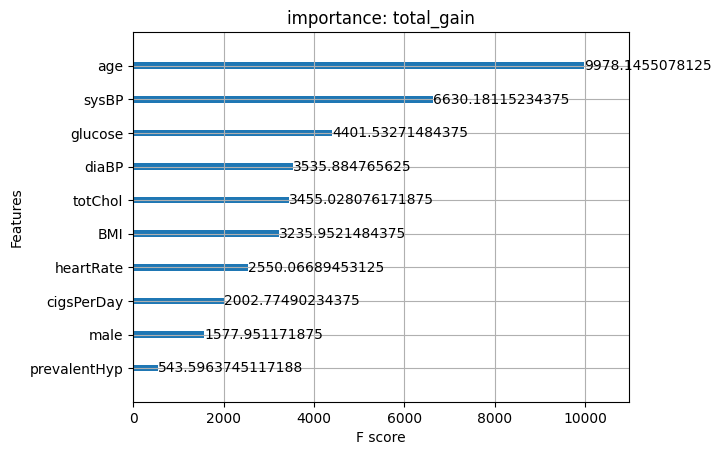

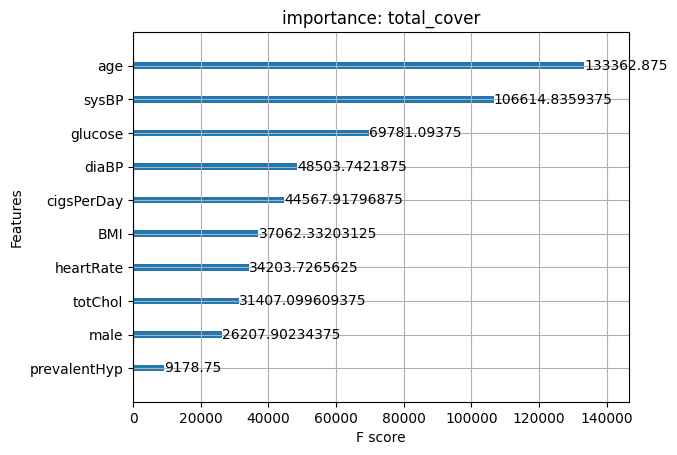

In [17]:
# Importance des features
types= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for f in types:
    xgb.plot_importance(xgbclf ,max_num_features=10, importance_type=f, title='importance: '+f)
plt.show()

In [23]:
# Validation croisée sur le jeu d'entraînement (3 folds) avec d'autres paramètres
params = {
    'booster' : 'gbtree',
    'learning_rate' : 0.1,
    'objective' : 'binary:logistic'
}
bst_cv = xgb.cv(params,train,num_boost_round=100,nfold=3,early_stopping_rounds=10)
display(bst_cv)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.426852,0.002977,0.434528,0.006300
1,0.413596,0.003231,0.428735,0.006100
2,0.401244,0.003021,0.424152,0.006528
3,0.391019,0.002798,0.420097,0.006501
4,0.381348,0.003325,0.416420,0.006899
5,0.372797,0.003036,0.413302,0.007451
6,0.364669,0.003504,0.410663,0.008595
7,0.356955,0.004116,0.408705,0.008746
8,0.349639,0.003947,0.407045,0.008488
9,0.343012,0.003506,0.405227,0.008291


### Evaluation du modèle

In [25]:
# Prédire les classes sur le jeu de test (seuil fixé à 0.5 pour la probabilité de classe 1)
y_pred_probas = xgbclf.predict(test)
y_pred = [1 if proba > 0.5 else 0 for proba in y_pred_probas]

# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Afficher l'erreur du modèle sur le jeu de validation
print(xgbclf.eval(valid))

[[655   4]
 [ 99   5]]
0.8650065530799476
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       659
           1       0.56      0.05      0.09       104

    accuracy                           0.87       763
   macro avg       0.71      0.52      0.51       763
weighted avg       0.83      0.87      0.81       763

[0]	eval-logloss:0.35949444799806995


### Bonus : Modèle LCE

In [27]:
from lce import LCEClassifier

# Créer et entraîner un modèle LCEClassifier
lceclf = LCEClassifier(n_estimators=2,n_jobs=-1,random_state=0)
lceclf.fit(X_train,y_train)

# Prédire les classes sur le jeu de test
y_pred = lceclf.predict(X_test)

pd.crosstab(y_test,y_pred,rownames=['Classes réelles'],colnames=['Classes prédites'])

ModuleNotFoundError: No module named 'lce'